In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os
np.random.seed(0)

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
image_datas = glob('C:/Users/smhrd/DeepStudy/abc/*/*.jpg')
class_name = ["ja","cha","ka"]
dic = {"ja":0, "cha":1, "ka":2}

In [3]:
image_datas

['C:/Users/smhrd/DeepStudy/abc\\cha\\1011-2_jpg.rf.1ca13e0a08ae2c809ca46a4b4630701b.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1011-2_jpg.rf.543c2858719b85bc27b21e2f967cd4cb.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1011-2_jpg.rf.f444669bd84742183910c5d50a212aa1.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1011_jpg.rf.b2ea1ce4e056e5a18e18a3101128c7cc.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1011_jpg.rf.cf189afea3012b016096098c652d1a1c.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1011_jpg.rf.d2261c8a8f884e42cd32833516cf849a.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1081_jpg.rf.581583321407d3a6f860dfc8ec1bcf0f.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1081_jpg.rf.5f9852b4cd56e668616ff5efb6269431.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\1081_jpg.rf.cfb01c59c9918bfbf4c02fd7cd961106.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\113_jpg.rf.3c80fec4b17d44303c08966b81a25860.jpg',
 'C:/Users/smhrd/DeepStudy/abc\\cha\\113_jpg.rf.509dc43b1947a342746765f4810e4741.jpg',
 'C:/Users/smhrd/DeepStudy/a

In [4]:
X=[]
Y=[]
for imagename in image_datas:
    image = Image.open(imagename)
    image = image.resize((30,30))
    image = np.array(image)
    X.append(image)
    label = imagename.split('\\')[1]
    label = dic[label]
    Y.append(label)

In [5]:
imagename.split('\\')[1]

'ka'

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, 
                                                                        test_size=0.2,
                                                                        shuffle=True,
                                                                        random_state=1)
train_labels = train_labels[..., tf.newaxis]
test_labels = test_labels[..., tf.newaxis]

train_images, test_images, train_labels, test_labels

(array([[[[  0,   1,   0],
          [  0,   0,   0],
          [  1,   0,   0],
          ...,
          [ 21,  19,  19],
          [ 15,  14,  14],
          [  9,   8,   8]],
 
         [[  0,   1,   0],
          [  0,   0,   0],
          [  1,   0,   0],
          ...,
          [141, 126, 123],
          [131, 119, 118],
          [121, 111, 112]],
 
         [[  0,   1,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [150, 131, 123],
          [147, 132, 128],
          [146, 135, 134]],
 
         ...,
 
         [[144, 143, 148],
          [145, 144, 151],
          [146, 144, 153],
          ...,
          [  0,   0,   0],
          [  0,   1,   0],
          [  0,   0,   0]],
 
         [[134, 133, 140],
          [141, 139, 146],
          [144, 144, 147],
          ...,
          [  0,   0,   0],
          [  0,   1,   0],
          [  0,   0,   2]],
 
         [[ 20,  19,  24],
          [ 31,  31,  34],
          [ 38,  37,  39],
   

In [8]:
# train set의 각 class별 image 수 확인
unique, counts = np.unique(np.reshape(train_labels, (283,)), axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 95, 1: 102, 2: 86}

In [9]:
# test set의 각 class별 image 수 확인
unique, counts = np.unique(np.reshape(test_labels, (71,)), axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 24, 1: 27, 2: 20}

In [10]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]
print(N_TRAIN, N_TEST)

283 71


In [11]:
train_images.shape

(283, 30, 30, 3)

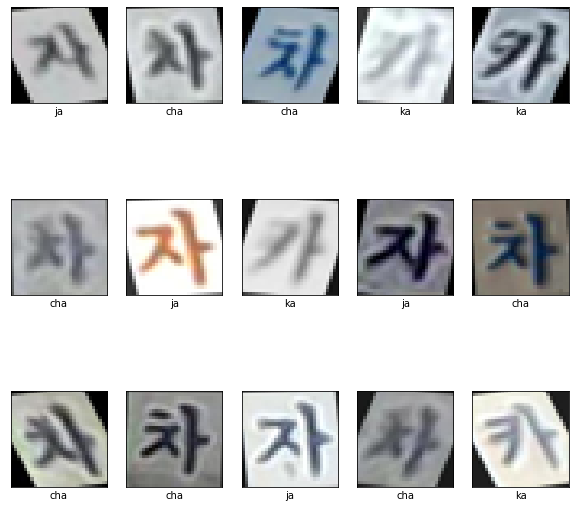

In [12]:
## Data확인
plt.figure(figsize=(10,10))
for i in range(15):
    img_idx = np.random.randint(0,283)
    plt.subplot(3,5,i+1)  #여러개의 그래프를 하나의 그림에 나타냄
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(class_name[train_labels[img_idx][0]])

In [13]:
# pixel 값을 0~1 사이 범위로 조정
train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.

#label을 onehot-encoding
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [14]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(283, 30, 30, 3) (283, 3)
(71, 30, 30, 3) (71, 3)


In [15]:
# Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 50
N_BATCH = 15
N_CLASS = 3

In [16]:
# dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,
                                                    train_labels)).shuffle(buffer_size=283).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,
                                                   test_labels)).batch(N_BATCH)

In [17]:
# Sequential API를 사용하여 model구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                                 activation='relu', padding='SAME',
                                 input_shape=(30,30,3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                                 activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                                 activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Dense(3,activation='softmax'))
    return model

In [18]:
# Create model, compile, summary
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [19]:
# Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = int(np.ceil(N_TEST//N_BATCH))
print(steps_per_epoch, validation_steps)

18 4


In [20]:
# train
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch,
                   validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/50
18/18 [==============================] - 0s 18ms/step - loss: 1.1386 - accuracy: 0.3185 - val_loss: 1.0957 - val_accuracy: 0.3833
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 1.1028 - accuracy: 0.3321 - val_loss: 1.0848 - val_accuracy: 0.3833
Epoch 3/50
18/18 [==============================] - 0s 12ms/step - loss: 1.0890 - accuracy: 0.3769 - val_loss: 1.0770 - val_accuracy: 0.3833
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 1.0925 - accuracy: 0.3321 - val_loss: 1.0632 - val_accuracy: 0.3833
Epoch 5/50
18/18 [==============================] - 0s 12ms/step - loss: 1.0574 - accuracy: 0.4216 - val_loss: 1.0470 - val_accuracy: 0.5167
Epoch 6/50
18/18 [==============================] - 0s 12ms/step - loss: 0.9464 - accuracy: 0.5597 - val_loss: 0.7886 - val_accuracy: 0.5667
Epoch 7/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6400 - accuracy: 0.7724 - val_loss: 0.3768 - val_accuracy: 0.8833
Epoch 8/50
18

In [21]:
model.save('abc_model.h5')

In [22]:
model.evaluate(test_dataset)

5/5 [==============================] - 0s 5ms/step - loss: 9.8087e-04 - accuracy: 1.0000


[0.0009808660252019763, 1.0]

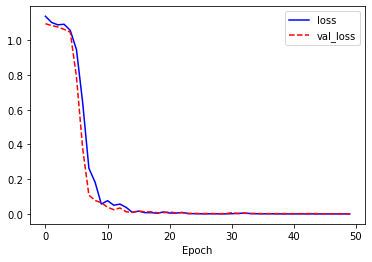

In [23]:
# Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

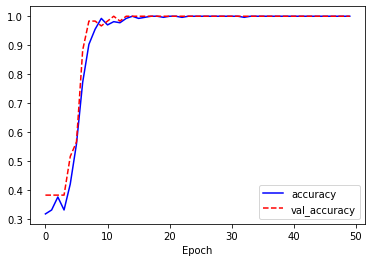

In [24]:
# Plot accuracy
plt.plot(history.history['accuracy'],'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
# 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                          100*np.max(predictions_array),
                                          class_name[true_label]),
                                          color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(N_CLASS), class_name, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(N_CLASS), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

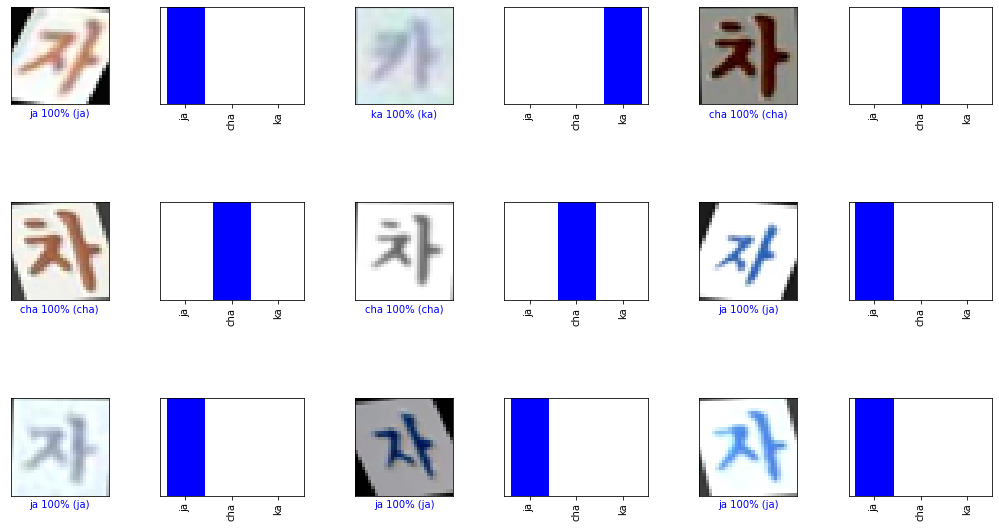

In [26]:
rnd_idx = np.random.randint(1, N_TEST//N_BATCH)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows=3
    num_cols=3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 3*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())
    break

In [27]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Answer :  [1]


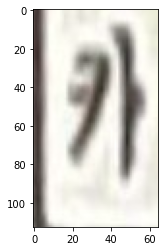

In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
model = load_model('abc_model.h5')
img = cv2.imread('./data/test/139_jpg.rf.8a24d386f779a9d594fc66d419987ca7.jpg')
plt.imshow(img)

img = np.resize(img, (1,30,30,3))
test_num = ((np.array(img)/255)-1)*-1
print("Answer : ", model.predict_classes(test_num))

In [29]:
import easyocr
reader = easyocr.Reader(['ko', 'en']) 
result = reader.readtext('./data/test/139_jpg.rf.8a24d386f779a9d594fc66d419987ca7.jpg') 
print(result)

C:\Users\smhrd\anaconda3\envs\project\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 10], [65, 10], [65, 86], [10, 86]], '기', 0.9709182890365788)]


Answer :  [2]


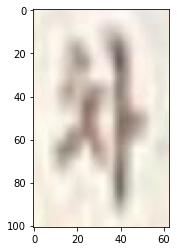

In [30]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
model = load_model('abc_model.h5')
img = cv2.imread('./data/test/cha2.png')
plt.imshow(img)

img = np.resize(img, (1,30,30,3))
test_num = ((np.array(img)/255)-1)*-1
print("Answer : ", model.predict_classes(test_num))

Answer :  [2]


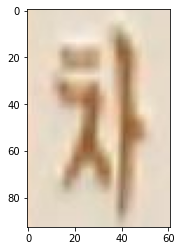

In [31]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
model = load_model('abc_model.h5')
img = cv2.imread('./data/test/cha3.png')
plt.imshow(img)

img = np.resize(img, (1,30,30,3))
test_num = ((np.array(img)/255)-1)*-1
print("Answer : ", model.predict_classes(test_num))